In [1]:
# Importing all the necessary Libraries
# Important Libraries
import pandas as pd
import numpy as np

#Libraries for analysis
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

# Libraries for testing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Libraries for splitting
from sklearn.model_selection import train_test_split

#setting random seed
np.random.seed(0)

In [2]:
dia = pd.read_csv('E:/thyroidData.csv')
dia.head()

,TSH,T3,TT4,T4U,FTI,Class
0,0.00060,0.015,0.120,0.082,0.146,3
1,0.00025,0.030,0.143,0.133,0.108,3
2,0.00190,0.024,0.102,0.131,0.078,3
3,0.00090,0.017,0.077,0.090,0.085,3
4,0.00025,0.026,0.139,0.090,0.153,3


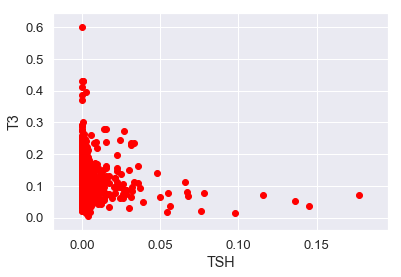

In [5]:
c1 = dia[dia.Class==3]
plt.xlabel("TSH")
plt.ylabel('T3')
plt.scatter(c1.TSH,c1.TT4,color='red',cmap='viridis')

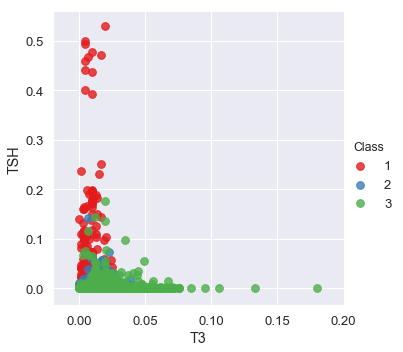

In [4]:
#plot two attributes
sns.lmplot('T3','TSH', data = dia,hue='Class',
          palette='Set1',fit_reg=False,scatter_kws={"s":60})

In [5]:
#Splitting the datasets
X = dia.iloc[:,0:5] #ith location select all row and from column 0 to 7
y = dia.iloc[:,5]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.2)
print('No of obeservation in the training set:',len(X_train))
print('No of obeservation in the training set:',len(X_test))

No of obeservation in the training set: 5760
No of obeservation in the training set: 1440


In [6]:
accu = []
ppv = []
sen = []
spec = []
f1 = []
n = [1,2,4,16,32,64,100,200]
for x in n:
    #creating a random forest classifier
    clf = RandomForestClassifier(n_jobs=2, n_estimators=x, random_state=0)
    #training the classifier
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_pred,y_test)
    mat = pd.crosstab(y_pred,y_test,rownames=['Predicted'],colnames=['Actual'])
    print("n_estimators = ",x)
    print(mat)
    
    # For Class A
    print("Class A:")
    TP,TN,FP,FN = cm[0][0],(cm[1][1]+cm[2][2]),(cm[0][1]+cm[0][2]),(cm[1][0]+cm[2][0])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_A = TP/(TP+FP)
    recall_A = TP/(TP+FN)
    specificity_A = TN/(FP+TN)
    F1_A = (2*TP)/(2*TP+FP+FN)
    acc_A = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_A)
    print("Recall: ",recall_A)
    print("Specificity: ",specificity_A)
    print("F1 Score: ",F1_A)
    print("Accuracy: ",acc_A)
    # For Class B
    print("Class B:")
    TP,TN,FP,FN = cm[1][1],(cm[0][0]+cm[2][2]),(cm[1][0]+cm[1][2]),(cm[0][1]+cm[2][1])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_B = TP/(TP+FP)
    recall_B = TP/(TP+FN)
    specificity_B = TN/(FP+TN)
    F1_B = (2*TP)/(2*TP+FP+FN)
    acc_B = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_B)
    print("Recall: ",recall_B)
    print("Specificity: ",specificity_B)
    print("F1 Score: ",F1_B)
    print("Accuracy: ",acc_B)
    # For Class C
    print("Class C:")
    TP,TN,FP,FN = cm[2][2],(cm[0][0]+cm[1][1]),(cm[2][0]+cm[2][1]),(cm[0][2]+cm[1][2])
    print("TP:",TP , " " , "TN:",TN," ","FP:",FP," ","FN:",FN)
    precision_C = TP/(TP+FP)
    recall_C = TP/(TP+FN)
    specificity_C = TN/(FP+TN)
    F1_C = (2*TP)/(2*TP+FP+FN)
    acc_C = (TP+TN)/(TP+TN+FP+FN)
    print("Precision:",precision_C)
    print("Recall: ",recall_C)
    print("Specificity: ",specificity_C)
    print("F1 Score: ",F1_C)
    print("Accuracy: ",acc_C)
    
    all_precision = (precision_A*39 + precision_B*83 + precision_C*1318) / 1440
    all_recall = (recall_A*39 + recall_B*83 + recall_C*1318) / 1440
    all_specificity = (specificity_A*39 + specificity_B*83 + specificity_C*1318) / 1440
    all_accuracy = (acc_A*39 + acc_B*83 + acc_C*1318) / 1440
    all_F1 =  (F1_A*39 + F1_B*83 + F1_C*1318) / 1440
    print("Overall Precision: ",round(all_precision,4))
    print("Overall Recall: ",round(all_recall,4))
    print("Overall Specificity: ",round(all_specificity,4))
    print("Overall Accuracy: ",round(all_accuracy,4))
    print("Overall F1 Score: ",round(all_F1,4))
    print("\n")
    accu.append(round(all_accuracy,4)*100)
    ppv.append(round(all_precision,4)*100)
    sen.append(round(all_recall,4)*100)
    spec.append(round(all_specificity,4)*100)
    f1.append(round(all_F1,4)*100)

n_estimators =  1
Actual      1   2     3
Predicted              
1          36   0     4
2           2  64    13
3           1  19  1301
Class A:
TP: 36   TN: 1365   FP: 4   FN: 3
Precision: 0.9
Recall:  0.9230769230769231
Specificity:  0.9970781592403214
F1 Score:  0.9113924050632911
Accuracy:  0.9950284090909091
Class B:
TP: 64   TN: 1337   FP: 15   FN: 19
Precision: 0.810126582278481
Recall:  0.7710843373493976
Specificity:  0.988905325443787
F1 Score:  0.7901234567901234
Accuracy:  0.9763066202090592
Class C:
TP: 1301   TN: 100   FP: 20   FN: 17
Precision: 0.9848599545798638
Recall:  0.9871016691957512
Specificity:  0.8333333333333334
F1 Score:  0.9859795377036756
Accuracy:  0.9742698191933241
Overall Precision:  0.9725
Overall Recall:  0.9729
Overall Specificity:  0.8467
Overall Accuracy:  0.9749
Overall F1 Score:  0.9727


n_estimators =  2
Actual      1   2     3
Predicted              
1          38   0     6
2           0  77    15
3           1   6  1297
Class A:
TP: 38   TN

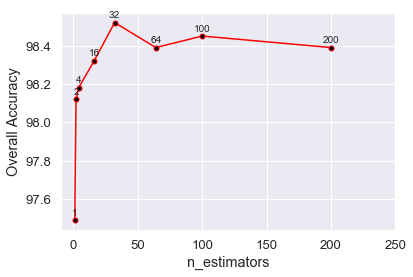

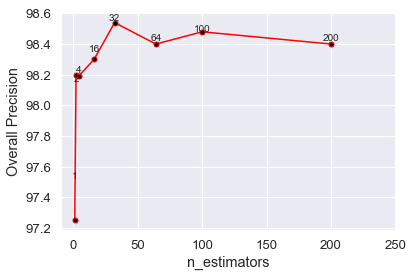

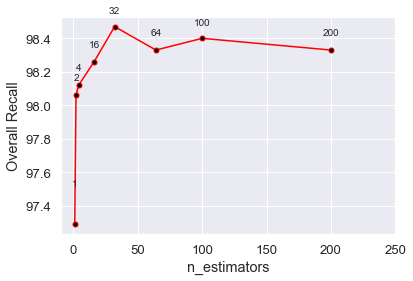

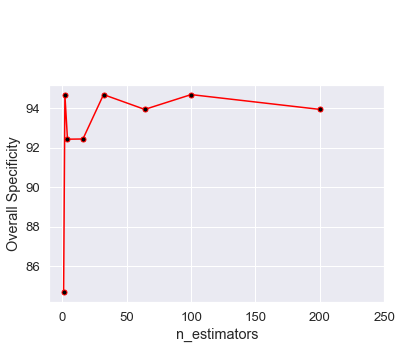

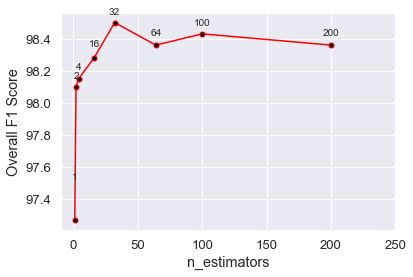

In [7]:
fig,ax = plt.subplots()
plt.plot(n,accu,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('n_estimators')
plt.ylabel('Overall Accuracy')
plt.xlim(-10,250)
for i,txt in enumerate(n):
    ax.annotate(txt,(n[i],accu[i]),textcoords='offset points',xytext=(0,5),ha='center')
plt.show()
fig,ax = plt.subplots()
plt.plot(n,ppv,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('n_estimators')
plt.ylabel('Overall Precision')
plt.xlim(-10,250)
for i,txt in enumerate(n):
    ax.annotate(txt,(n[i],accu[i]),textcoords='offset points',xytext=(0,5),ha='center')
plt.show()
fig,ax = plt.subplots()
plt.plot(n,sen,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('n_estimators')
plt.ylabel('Overall Recall')
plt.xlim(-10,250)
for i,txt in enumerate(n):
    ax.annotate(txt,(n[i],accu[i]),textcoords='offset points',xytext=(0,5),ha='center')
plt.show()
fig,ax = plt.subplots()
plt.plot(n,spec,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('n_estimators')
plt.ylabel('Overall Specificity')
plt.xlim(-10,250)
for i,txt in enumerate(n):
    ax.annotate(txt,(n[i],accu[i]),textcoords='offset points',xytext=(0,5),ha='center')
plt.show()
fig,ax = plt.subplots()
plt.plot(n,f1,color='red',marker='o',markersize=5,markerfacecolor='black')
plt.xlabel('n_estimators')
plt.ylabel('Overall F1 Score')
plt.xlim(-10,250)
for i,txt in enumerate(n):
    ax.annotate(txt,(n[i],accu[i]),textcoords='offset points',xytext=(0,5),ha='center')
plt.show()